In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.random.seed(42)

In [2]:
# Loading the data and creating DataFrame
df = pd.read_csv('./data/data_eda.csv')

In [3]:
# Checking the data
df.head()

,log_price,price,availability_365,review_scores_cleanliness,bathrooms_text,instant_bookable,reviews_per_month,host_response_time,latitude,bedrooms,...,host_is_superhost,minimum_nights,availability_90,neighbourhood_cleansed,beds,room_type,property_type,number_of_reviews_ltm,has_availability,review_scores_rating
0,6.150603,469.0,0,10.0,11,False,0.10,1,43.64590,5.0,...,False,28,0,71,7.0,0,14,0,True,100.0
1,4.543295,94.0,365,10.0,5,True,1.19,0,43.64080,1.0,...,False,180,90,122,1.0,2,21,0,True,97.0
2,4.276666,72.0,365,10.0,4,True,1.64,1,43.69805,1.0,...,False,28,90,15,1.0,2,36,0,True,95.0
3,4.605170,100.0,283,9.0,2,False,0.86,4,43.63539,2.0,...,False,30,8,109,2.0,0,14,2,True,93.0
4,4.532599,93.0,363,10.0,3,False,0.60,3,43.74922,2.0,...,False,2,88,128,2.0,2,24,1,True,99.0


### In my dataframe I have both price and log_price. I will use both of them separately for modelling and compare the results.

### I will drop log_price first and do modelling on the remaining data

In [4]:
# Dropping the log_price
dfp = df.drop(['log_price'], axis = 1)
dfp.head()

,price,availability_365,review_scores_cleanliness,bathrooms_text,instant_bookable,reviews_per_month,host_response_time,latitude,bedrooms,accommodates,...,host_is_superhost,minimum_nights,availability_90,neighbourhood_cleansed,beds,room_type,property_type,number_of_reviews_ltm,has_availability,review_scores_rating
0,469.0,0,10.0,11,False,0.10,1,43.64590,5.0,10,...,False,28,0,71,7.0,0,14,0,True,100.0
1,94.0,365,10.0,5,True,1.19,0,43.64080,1.0,2,...,False,180,90,122,1.0,2,21,0,True,97.0
2,72.0,365,10.0,4,True,1.64,1,43.69805,1.0,3,...,False,28,90,15,1.0,2,36,0,True,95.0
3,100.0,283,9.0,2,False,0.86,4,43.63539,2.0,5,...,False,30,8,109,2.0,0,14,2,True,93.0
4,93.0,363,10.0,3,False,0.60,3,43.74922,2.0,4,...,False,2,88,128,2.0,2,24,1,True,99.0


In [5]:
# Split data into X and y
X = dfp.drop('price', axis = 1)
y = dfp['price']

In [6]:
# Checking X 
X

,availability_365,review_scores_cleanliness,bathrooms_text,instant_bookable,reviews_per_month,host_response_time,latitude,bedrooms,accommodates,availability_60,...,host_is_superhost,minimum_nights,availability_90,neighbourhood_cleansed,beds,room_type,property_type,number_of_reviews_ltm,has_availability,review_scores_rating
0,0,10.0,11,False,0.10,1,43.64590,5.0,10,0,...,False,28,0,71,7.0,0,14,0,True,100.0
1,365,10.0,5,True,1.19,0,43.64080,1.0,2,60,...,False,180,90,122,1.0,2,21,0,True,97.0
2,365,10.0,4,True,1.64,1,43.69805,1.0,3,60,...,False,28,90,15,1.0,2,36,0,True,95.0
3,283,9.0,2,False,0.86,4,43.63539,2.0,5,0,...,False,30,8,109,2.0,0,14,2,True,93.0
4,363,10.0,3,False,0.60,3,43.74922,2.0,4,58,...,False,2,88,128,2.0,2,24,1,True,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,81,8.0,7,True,1.00,4,43.63780,1.0,2,51,...,False,1,81,87,1.0,0,8,1,True,80.0
10795,70,8.0,2,False,1.00,4,43.65734,2.0,4,50,...,False,2,70,62,2.0,0,5,1,True,80.0
10796,89,10.0,4,False,1.00,4,43.64015,1.0,2,60,...,False,1,89,122,1.0,2,28,1,True,100.0
10797,65,10.0,2,True,1.00,4,43.62431,1.0,3,35,...,False,2,65,77,2.0,0,8,1,True,100.0


In [7]:
# Checking y
y

0        469.0
1         94.0
2         72.0
3        100.0
4         93.0
         ...  
10794    114.0
10795     71.0
10796    195.0
10797    128.0
10798     88.0
Name: price, Length: 10799, dtype: float64

In [8]:
# Importing the train- test model from sklearn library
from sklearn.model_selection import train_test_split

In [9]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [10]:
# Checking the length of different test and train sets
len(X_train),len(y_train),len(X_test),len(y_test)

(8639, 8639, 2160, 2160)

I am going to use 5 different machine learning models:

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. K-Nearest Neighbors
5. Random Forest

In [11]:
# Preparing function to draw plots
def draw_plots(y_test, y_preds):
    '''
    Creates histogram and regression plots of y_test and y_preds
    
    Args:
        y_test = target data from test set
        y_preds = predicted target 
    '''
    fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
    ax[0,0].hist(y_preds)
    ax[0,0].set_title('Histogram of predicted y')
    ax[0,0].set_xlabel('Pridected y')
    ax[0,0].set_ylabel('Count')

    sns.regplot(y_test, y_preds, ax = ax[0,1])
    ax[0,1].set_title('Actual y vs. Predicted y')
    ax[0,1].set_xlabel('Actual y')
    ax[0,1].set_ylabel('Predicted y')

    sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
    ax[1,0].set_title('Residual Plot')
    ax[1,0].set_xlabel('Predicted y')
    ax[1,0].set_ylabel('Residuals')

    ax[1,1].hist(y_test - y_preds)
    ax[1,1].set_title('Histogram of Residuals')
    ax[1,1].set_xlabel('Residuals')
    ax[1,1].set_ylabel('Count');

### Using Linear Regression Model

In [12]:
# Importing LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# Training Model Score
lr.score(X_train,y_train)

0.06679031754829468

In [15]:
#Making the predictions
y_preds = lr.predict(X_test)

In [16]:
# Making Predictions
y_preds

array([123.73203127,  81.37361282, 181.29665819, ..., -18.77277826,
       141.59421067, 434.49684946])

In [17]:
# Test Model Score
lr.score(X_test, y_test)

0.04979434165983809

In [18]:
# Importing mean_absolute_errora and mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, y_preds))

79.77345006722108


In [19]:
# Calculating mean_squared_error
print(mean_squared_error(y_test, y_preds))

215505.83745421923


In [20]:
# Calculating mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
rmse

464.2260628769342

/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


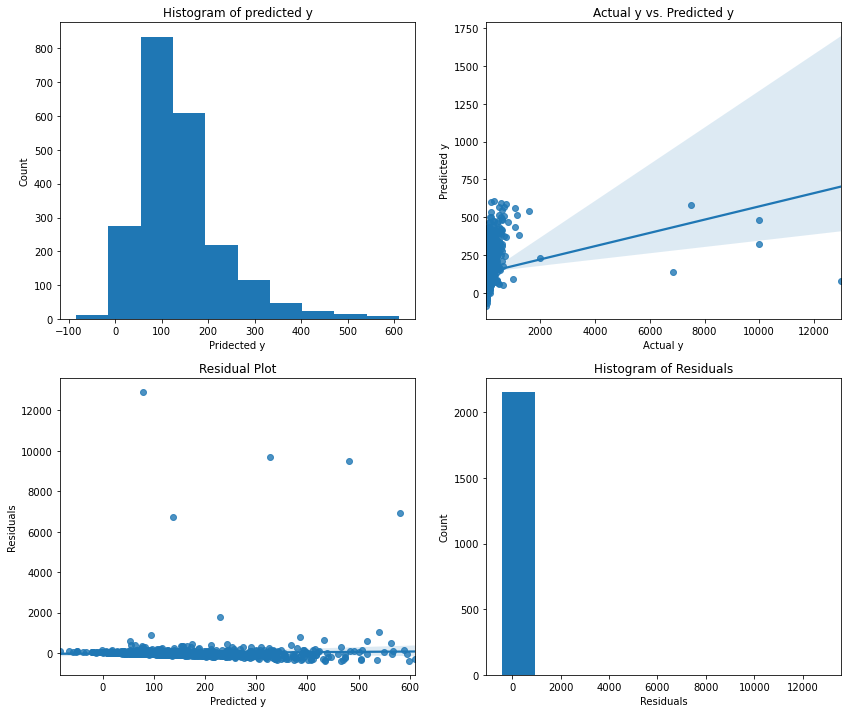

In [21]:
draw_plots(y_test,y_preds)

### Using Ridge Regression

In [22]:
# Importing the model
from sklearn.linear_model import Ridge
ri = Ridge()

In [23]:
# Fitting the model on training data
ri.fit(X_train, y_train)

Ridge()

In [24]:
# Finding Train model score
ri.score(X_train, y_train)

0.06678034055424109

In [25]:
# Making Predictions
yr_preds = ri.predict(X_test)

In [26]:
# Getting Predictions
yr_preds

array([123.91381918,  82.68438562, 183.24090064, ..., -19.68627461,
       140.51140217, 431.48335294])

In [27]:
# Finding test model score
ri.score(X_test, y_test)

0.04987140477337548

In [28]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yr_preds))

79.56402336829625


In [29]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yr_preds))

215488.3596054252


In [30]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yr_preds)))
rmse

464.2072377779403


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


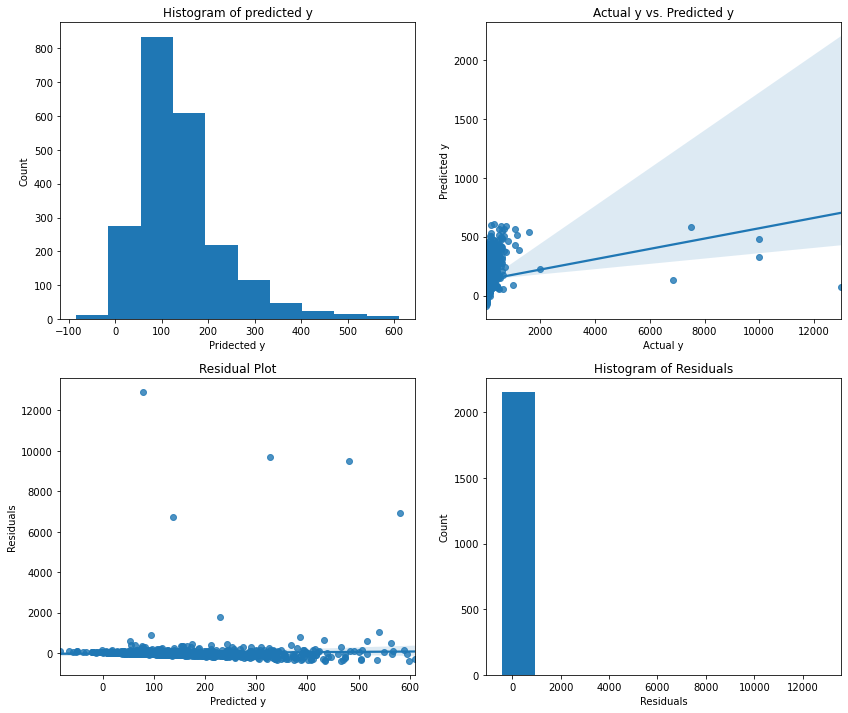

In [31]:
draw_plots(y_test,y_preds)

### Using Lasso Regression

In [32]:
# Importing the model
from sklearn.linear_model import Lasso
la=Lasso()

In [33]:
# Fitting the model on training data
la.fit(X_train, y_train)

Lasso()

In [34]:
# Finding Train model score
la.score(X_train, y_train)

0.06293757460311034

In [35]:
# Making Predictions
yl_preds = la.predict(X_test)

In [36]:
# Getting Predictions
yl_preds

array([124.7134483 , 112.41273525, 210.20629611, ..., -36.14601775,
       127.93326151, 360.21568641])

In [37]:
# Finding test model score
la.score(X_test, y_test)

0.04840614155227185

In [38]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yl_preds))

79.01384540476452


In [39]:
# Calculating Mean Squared  error
print(mean_squared_error(y_test, yl_preds))

215820.68006130043


In [40]:
# Calculating Root Mean squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yl_preds)))
rmse

464.5650439511139


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


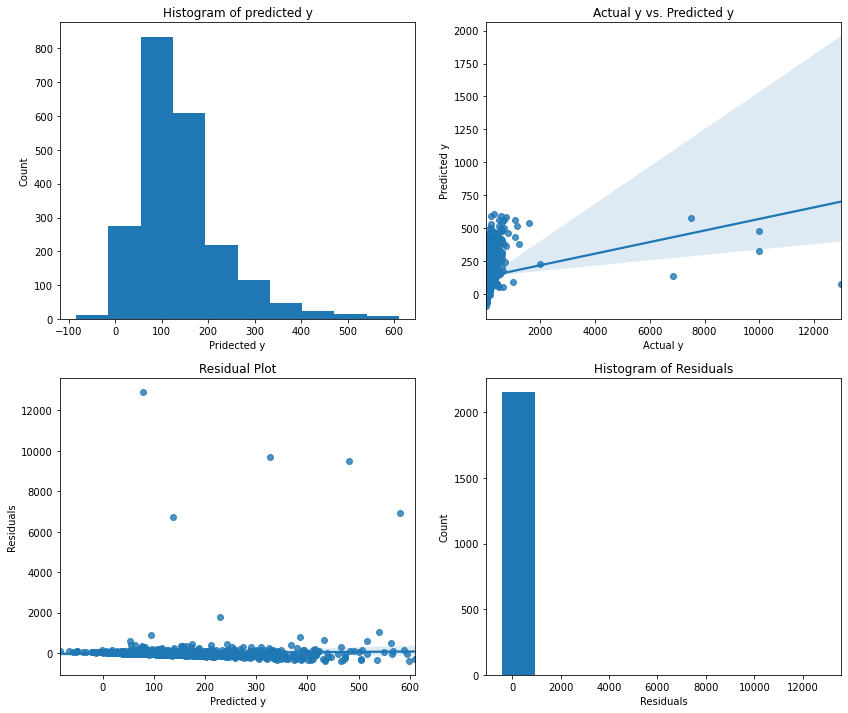

In [41]:
draw_plots(y_test,y_preds)

### Using K-Nearest Neighbors

In [42]:
# Importing the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [43]:
# Fitting the model on training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [44]:
# Finding Train model score
knn.score(X_train, y_train)

0.21624756434899772

In [45]:
# Making Predictions
yk_preds = knn.predict(X_test)

In [46]:
# Getting Predictions
yk_preds

array([ 93.6, 108.8, 362.6, ..., 127.2,  70.6,  57.8])

In [47]:
# Finding test model score
knn.score(X_test, y_test)

-0.046496221755755185

In [48]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yk_preds))

97.14212962962964


In [49]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yk_preds))

237344.45557407406


In [50]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yk_preds)))
rmse

487.1801058890583


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


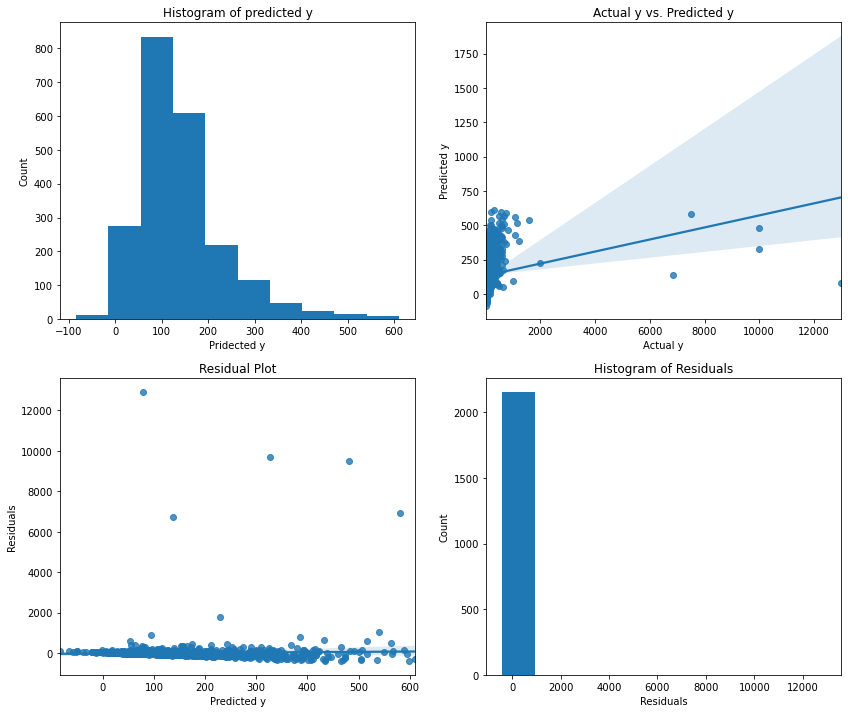

In [51]:
draw_plots(y_test,y_preds)

### Using Random Forest

In [52]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [53]:
# Fitting the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
# Finding Train model score
rf.score(X_train, y_train)

0.9023779648448557

In [55]:
# Making Predictions
yrf_preds = rf.predict(X_test)

In [56]:
yrf_preds

array([101.99,  79.07, 167.55, ...,  65.23, 110.87, 114.14])

In [57]:
# Finding test model score
rf.score(X_test, y_test)

0.2159050975486898

In [58]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yrf_preds))

71.98893055555556


In [59]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yrf_preds))

177832.05889504636


In [60]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yrf_preds)))
rmse

421.70138592971966


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


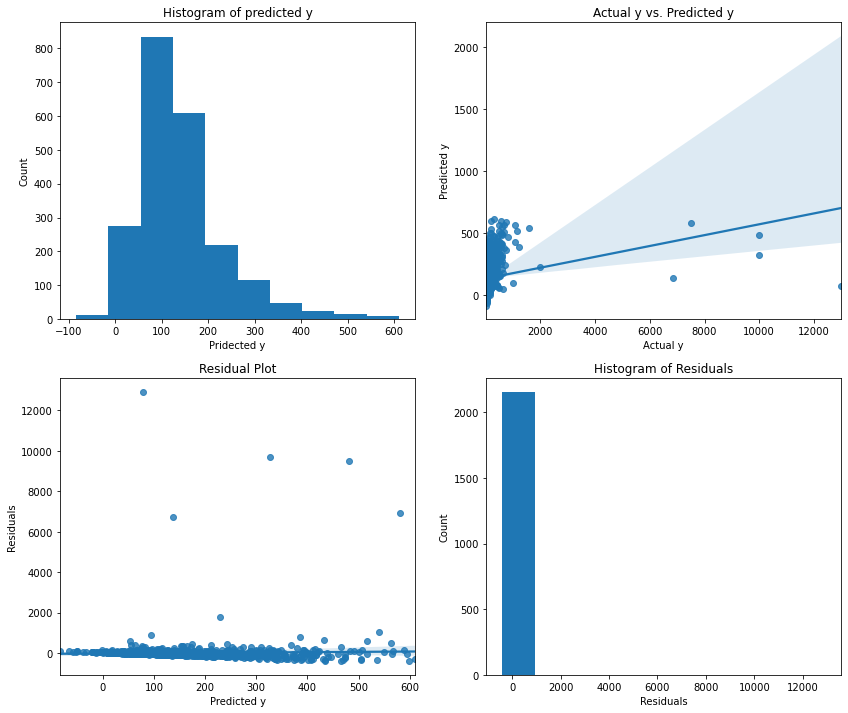

In [61]:
draw_plots(y_test,y_preds)

In [62]:
# Pandas DataFrame for Model and RMSE
model = pd.Series(['Linear', 'Ridge', 'Lasso', 'KNN', 'RandomForest'])
rmse = pd.Series([464.2260628769342, 464.2072377779403, 464.5650439511139, 487.1801058890583, 421.70138592971966])
modelRmsedf = pd.DataFrame({'Model':model, 'RMSE':rmse})
modelRmsedf

,Model,RMSE
0,Linear,464.226063
1,Ridge,464.207238
2,Lasso,464.565044
3,KNN,487.180106
4,RandomForest,421.701386


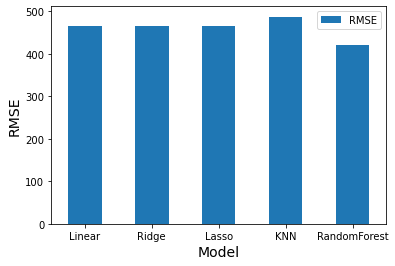

In [63]:
# Bar Plot of Models and their RMSE values
modelRmsedf.plot(x = 'Model', y = 'RMSE', kind = 'bar')
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=0)
plt.show()

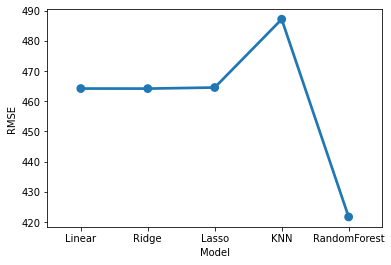

In [64]:
# Pointplot of RMSE values
fig, axes = plt.subplots()
sns.pointplot(x = 'Model', y = 'RMSE', data = modelRmsedf)
plt.show()

* Random Forest has the best Root Mean Square Error (RMSE) when Price column is used.


### I will drop 'price' column now and do modelling on the remaining data

In [65]:
# Checking the original data
df.head()

,log_price,price,availability_365,review_scores_cleanliness,bathrooms_text,instant_bookable,reviews_per_month,host_response_time,latitude,bedrooms,...,host_is_superhost,minimum_nights,availability_90,neighbourhood_cleansed,beds,room_type,property_type,number_of_reviews_ltm,has_availability,review_scores_rating
0,6.150603,469.0,0,10.0,11,False,0.10,1,43.64590,5.0,...,False,28,0,71,7.0,0,14,0,True,100.0
1,4.543295,94.0,365,10.0,5,True,1.19,0,43.64080,1.0,...,False,180,90,122,1.0,2,21,0,True,97.0
2,4.276666,72.0,365,10.0,4,True,1.64,1,43.69805,1.0,...,False,28,90,15,1.0,2,36,0,True,95.0
3,4.605170,100.0,283,9.0,2,False,0.86,4,43.63539,2.0,...,False,30,8,109,2.0,0,14,2,True,93.0
4,4.532599,93.0,363,10.0,3,False,0.60,3,43.74922,2.0,...,False,2,88,128,2.0,2,24,1,True,99.0


In [66]:
# Dropping the price column
dfp = df.drop(['price'], axis = 1)
dfp.head()

,log_price,availability_365,review_scores_cleanliness,bathrooms_text,instant_bookable,reviews_per_month,host_response_time,latitude,bedrooms,accommodates,...,host_is_superhost,minimum_nights,availability_90,neighbourhood_cleansed,beds,room_type,property_type,number_of_reviews_ltm,has_availability,review_scores_rating
0,6.150603,0,10.0,11,False,0.10,1,43.64590,5.0,10,...,False,28,0,71,7.0,0,14,0,True,100.0
1,4.543295,365,10.0,5,True,1.19,0,43.64080,1.0,2,...,False,180,90,122,1.0,2,21,0,True,97.0
2,4.276666,365,10.0,4,True,1.64,1,43.69805,1.0,3,...,False,28,90,15,1.0,2,36,0,True,95.0
3,4.605170,283,9.0,2,False,0.86,4,43.63539,2.0,5,...,False,30,8,109,2.0,0,14,2,True,93.0
4,4.532599,363,10.0,3,False,0.60,3,43.74922,2.0,4,...,False,2,88,128,2.0,2,24,1,True,99.0


In [67]:
# Split data into X and y
X = dfp.drop('log_price', axis = 1)
y = dfp['log_price']

In [68]:
# Checking X
X

,availability_365,review_scores_cleanliness,bathrooms_text,instant_bookable,reviews_per_month,host_response_time,latitude,bedrooms,accommodates,availability_60,...,host_is_superhost,minimum_nights,availability_90,neighbourhood_cleansed,beds,room_type,property_type,number_of_reviews_ltm,has_availability,review_scores_rating
0,0,10.0,11,False,0.10,1,43.64590,5.0,10,0,...,False,28,0,71,7.0,0,14,0,True,100.0
1,365,10.0,5,True,1.19,0,43.64080,1.0,2,60,...,False,180,90,122,1.0,2,21,0,True,97.0
2,365,10.0,4,True,1.64,1,43.69805,1.0,3,60,...,False,28,90,15,1.0,2,36,0,True,95.0
3,283,9.0,2,False,0.86,4,43.63539,2.0,5,0,...,False,30,8,109,2.0,0,14,2,True,93.0
4,363,10.0,3,False,0.60,3,43.74922,2.0,4,58,...,False,2,88,128,2.0,2,24,1,True,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,81,8.0,7,True,1.00,4,43.63780,1.0,2,51,...,False,1,81,87,1.0,0,8,1,True,80.0
10795,70,8.0,2,False,1.00,4,43.65734,2.0,4,50,...,False,2,70,62,2.0,0,5,1,True,80.0
10796,89,10.0,4,False,1.00,4,43.64015,1.0,2,60,...,False,1,89,122,1.0,2,28,1,True,100.0
10797,65,10.0,2,True,1.00,4,43.62431,1.0,3,35,...,False,2,65,77,2.0,0,8,1,True,100.0


In [69]:
# Checking y
y

0        6.150603
1        4.543295
2        4.276666
3        4.605170
4        4.532599
           ...   
10794    4.736198
10795    4.262680
10796    5.273000
10797    4.852030
10798    4.477337
Name: log_price, Length: 10799, dtype: float64

In [70]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [71]:
# Checking the length of different test and train sets
len(X_train),len(y_train),len(X_test),len(y_test)

(8639, 8639, 2160, 2160)

### Using Linear Regression Model

In [72]:
# Importing LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [73]:
# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
# Training Model Score
lr.score(X_train,y_train)

0.5180897848602437

In [75]:
#Making the predictions
y_preds = lr.predict(X_test)

In [76]:
y_preds

array([4.03170565, 4.29002514, 4.34625676, ..., 4.45701957, 4.85674196,
       4.91127581])

In [77]:
# Test Model Score
lr.score(X_test, y_test)

0.567350839202971

In [78]:
# Calculating Mean Absolute Error
print(mean_absolute_error(y_test, y_preds))

0.33885048155992403


In [79]:
# Calculating mean_squared_error
print(mean_squared_error(y_test, y_preds))

0.2009120184295655


In [80]:
# Calculating Root Mean Squared Error
rmse = print(np.sqrt(mean_squared_error(y_test, y_preds)))
rmse

0.4482321033009187


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


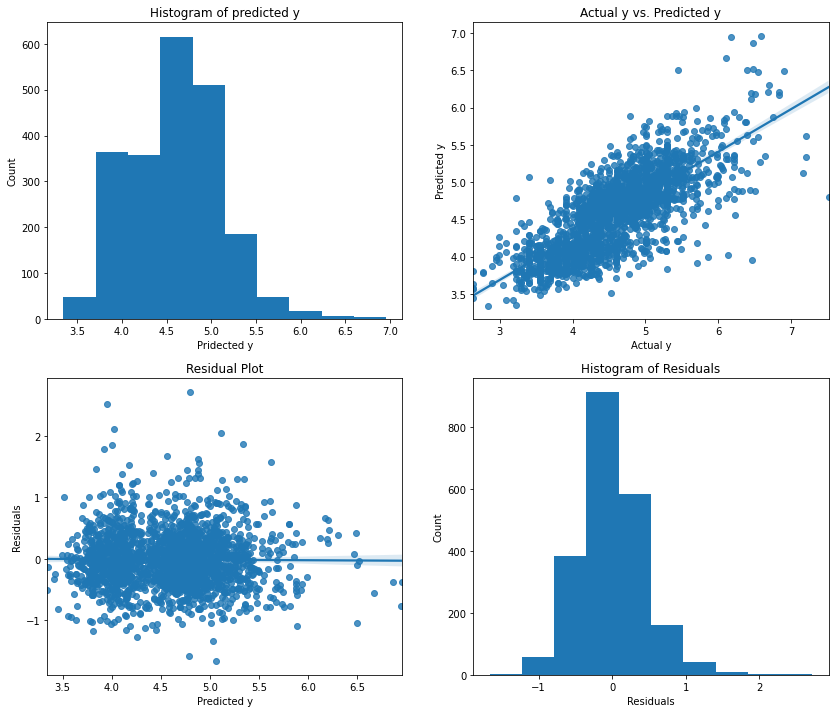

In [81]:
draw_plots(y_test,y_preds)

### Using Ridge Regression

In [82]:
# Importing the model
from sklearn.linear_model import Ridge
ri = Ridge()

In [83]:
# Fitting the model on training data
ri.fit(X_train, y_train)

Ridge()

In [84]:
# Finding Train model score
ri.score(X_train, y_train)

0.5180200445680962

In [85]:
# Making Predictions
yr_preds = ri.predict(X_test)

In [86]:
yr_preds

array([4.02726666, 4.27924322, 4.34700762, ..., 4.45483593, 4.86060129,
       4.90802335])

In [87]:
# Finding test model score
ri.score(X_test, y_test)

0.567165123357374

In [88]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yr_preds))

0.33901816591522416


In [89]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yr_preds))

0.2009982604676282


In [90]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yr_preds)))
rmse

0.44832829541266767


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


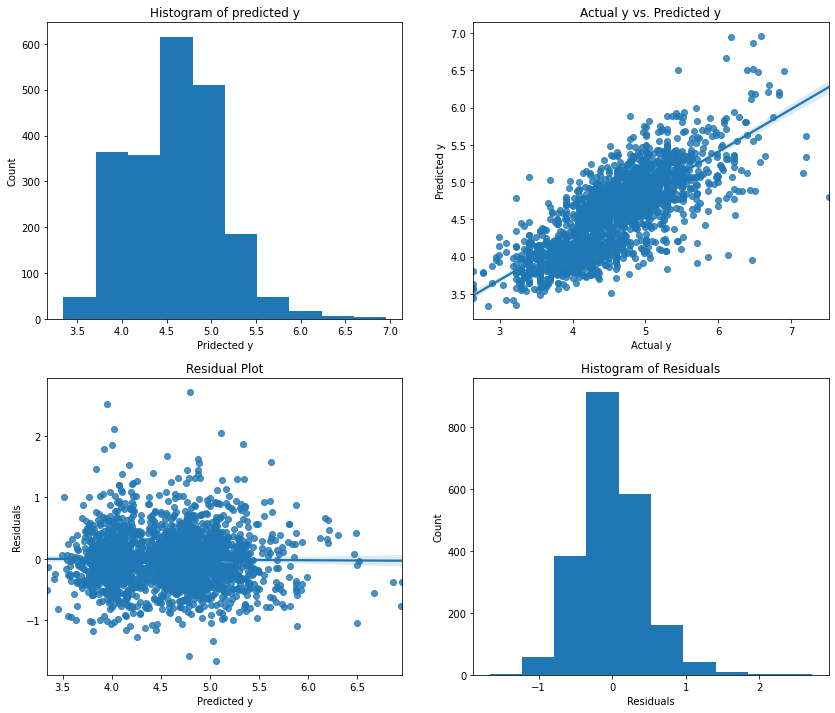

In [91]:
draw_plots(y_test,y_preds)

### Using Lasso Regression

In [92]:
# Importing the model
from sklearn.linear_model import Lasso
la=Lasso()

In [93]:
# Fitting the model on training data
la.fit(X_train, y_train)

Lasso()

In [94]:
# Finding Train model score
la.score(X_train, y_train)

0.22938653391046204

In [95]:
# Making Predictions
yl_preds = la.predict(X_test)

In [96]:
# Getting Predictions
yl_preds

array([4.46852943, 4.2007425 , 4.79217136, ..., 4.72261273, 4.75465204,
       4.8189361 ])

In [97]:
# Finding test model score
la.score(X_test, y_test)

0.2575100428200975

In [98]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yl_preds))

0.45371284555444447


In [99]:
# Calculating Mean Squared  error
print(mean_squared_error(y_test, yl_preds))

0.3447947424326086


In [100]:
# Calculating Root Mean squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yl_preds)))
rmse

0.5871922533826622


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


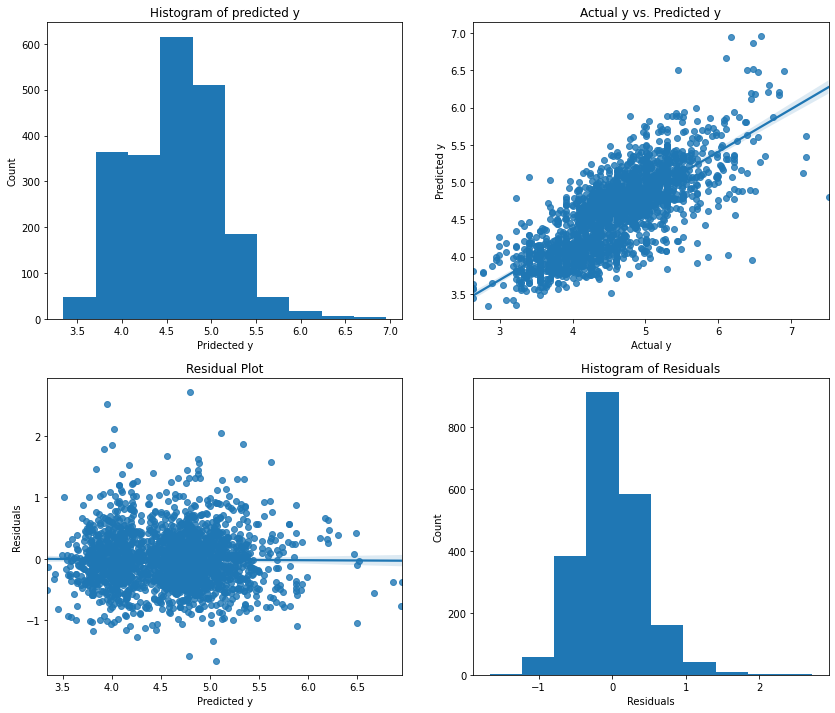

In [101]:
draw_plots(y_test,y_preds)

### Using K-Nearest Neighbors

In [102]:
# Importing the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [103]:
# Fitting the model on training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [104]:
# Finding Train model score
knn.score(X_train, y_train)

0.5772761892213274

In [105]:
# Making Predictions
yk_preds = knn.predict(X_test)

In [106]:
yk_preds

array([4.31441949, 3.65008593, 4.54215378, ..., 4.47434882, 4.18777039,
       4.98572255])

In [107]:
# Finding test model score
knn.score(X_test, y_test)

0.35129284677702766

In [108]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yk_preds))

0.41354092313296326


In [109]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yk_preds))

0.3012442305068254


In [110]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yk_preds)))
rmse

0.5488572041130784


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


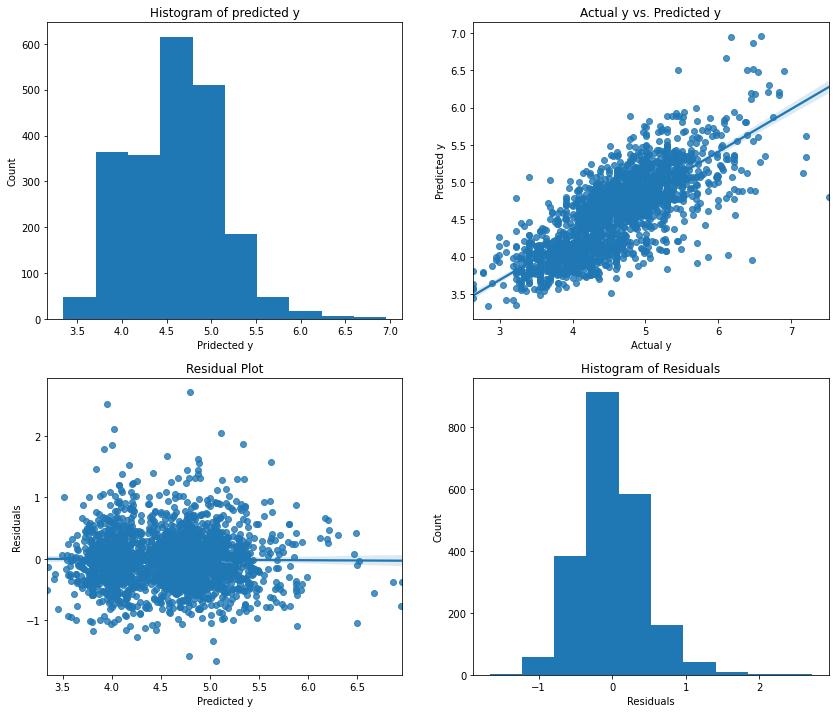

In [111]:
draw_plots(y_test,y_preds)

### Using Random Forest

In [112]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [113]:
# Fitting the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor()

In [114]:
# Finding Train model score
rf.score(X_train, y_train)

0.9473002323193248

In [115]:
# Making Predictions
yrf_preds = rf.predict(X_test)
yrf_preds

array([4.14565882, 3.49157917, 4.38640096, ..., 4.49948026, 4.9343071 ,
       5.14264663])

In [116]:
# Finding test model score
rf.score(X_test, y_test)

0.6451489772073219

In [117]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yrf_preds))

0.2958996839338249


In [118]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yrf_preds))

0.1647844066072722


In [119]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yrf_preds)))
rmse

0.4059364563663532


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


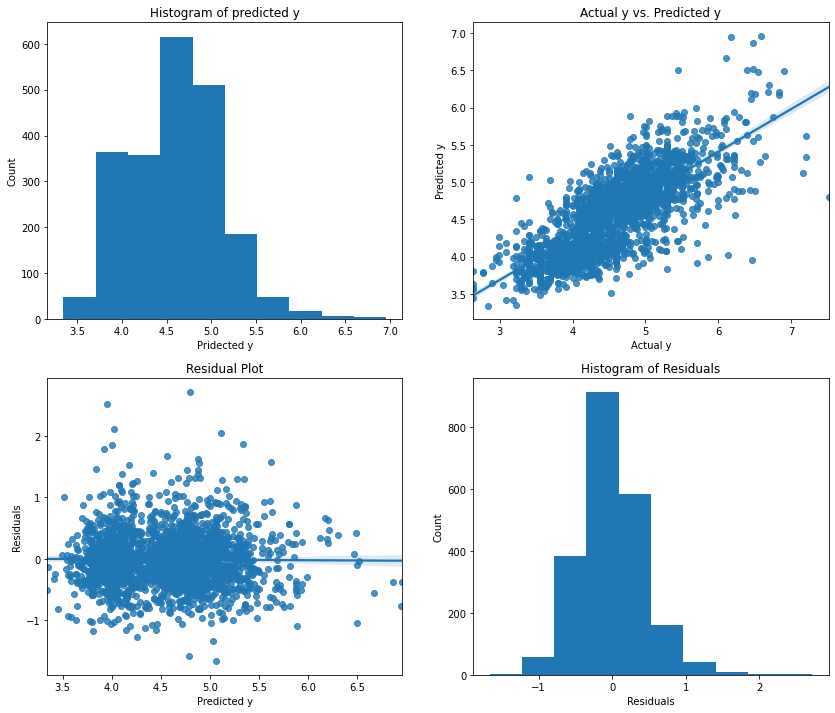

In [120]:
draw_plots(y_test,y_preds)

In [121]:
# Pandas DataFrame for Model and RMSE
model = pd.Series(['Linear', 'Ridge', 'Lasso', 'KNN', 'RandomForest'])
rmse = pd.Series([0.4482321033009187, 0.44832829541266767, 0.5871922533826622, 0.5488572041130784, 0.4059364563663532])
modelRmsedf = pd.DataFrame({'Model':model, 'RMSE':rmse})
modelRmsedf

,Model,RMSE
0,Linear,0.448232
1,Ridge,0.448328
2,Lasso,0.587192
3,KNN,0.548857
4,RandomForest,0.405936


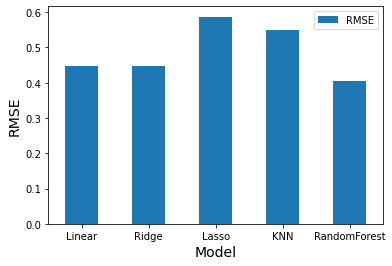

In [122]:
# Bar Plot of Models and their RMSE values
modelRmsedf.plot(x = 'Model', y = 'RMSE', kind = 'bar')
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=0)
plt.show()

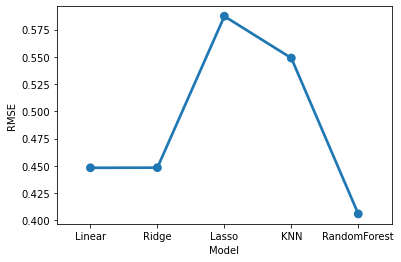

In [123]:
# Pointplot of RMSE values
fig, axes = plt.subplots()
sns.pointplot(x = 'Model', y = 'RMSE', data = modelRmsedf)
plt.show()

* RandomForest has the best Root Mean Square Error (RMSE) when logPrice column is used.

### Conclusion

I tried 5 different models on Airbnb listing price prediction

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. K-Nearest Neighbors
5. Random Forest

* RandomForestn has the best Root Mean Square Error (RMSE) when Price column is used.

* RandomForest has the best Root Mean Square Error (RMSE) when log_Price column is used.

* Linear regression models did not perform well because there are less data points with price above dollar 200 and looks like they have a different linear relationship. 50% listings are below dollar 99.

* RSME can be improved further by fine tuning the hyperparameters.

